In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
import skimage.measure as measure
from cv2 import morphologyEx

In [13]:
image = cv2.imread("images/dishes/IMG_8873.JPG")

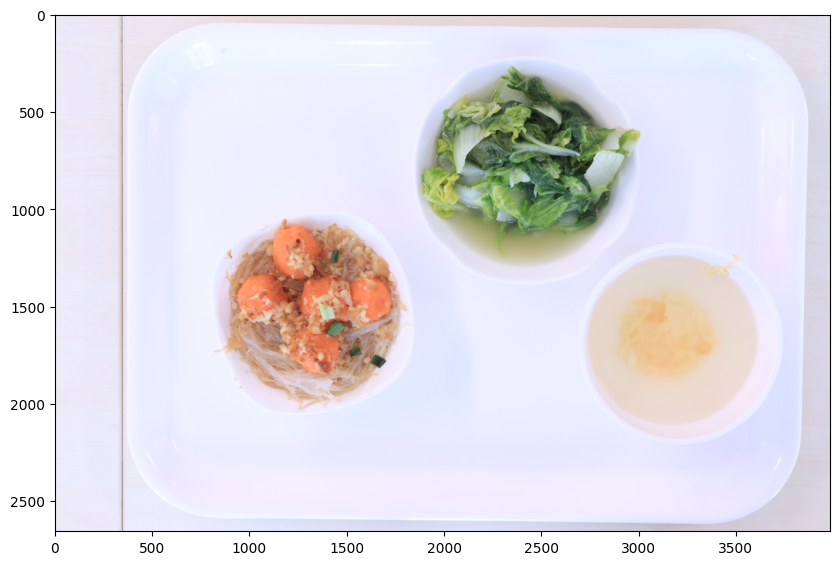

In [14]:
# show original image
plt.figure(figsize=(10, 10))    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert to grayscale
# invert the image
gray_image = cv2.bitwise_not(gray_image)
# convert the image to float
gray_image = gray_image.astype(float)

In [16]:
# apply gaussian filter
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

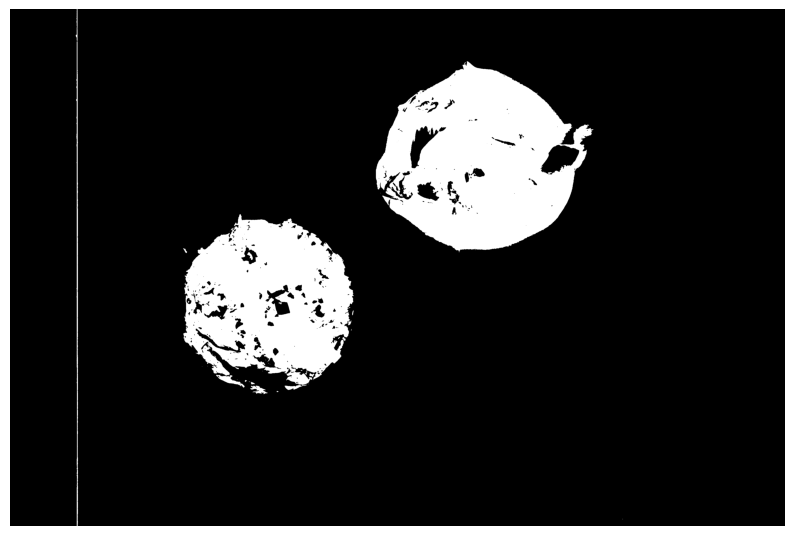

In [17]:
threshold = filters.threshold_otsu(gray_image)
bina_otsu = gray_image > threshold

# plot the image
plt.figure(figsize=(10, 10))
plt.imshow(bina_otsu, cmap='gray')
plt.axis('off')
plt.show()

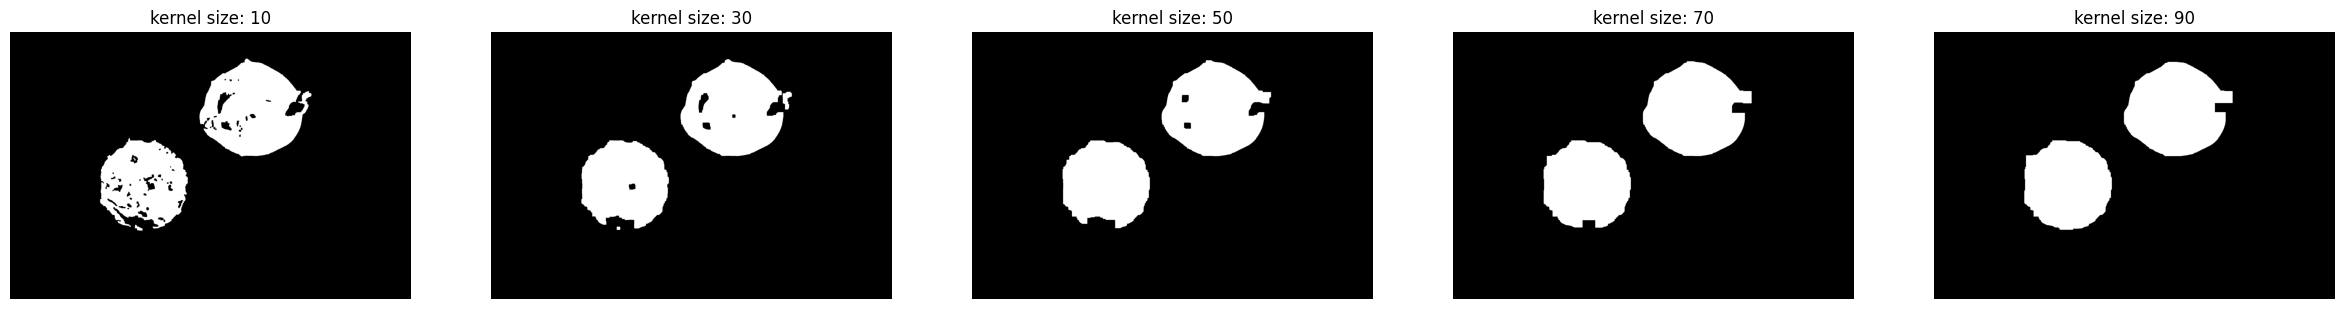

In [18]:
# use closing and opening to remove noise

# i want all the holes to be filled with a big kernel
# try different kernel sizes
kernels = [10,30,50,70,90]
openings = []
for kernel in kernels:
    kernel = np.ones((kernel, kernel), np.uint8)
    closing = morphologyEx(bina_otsu.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
    opening = morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    openings.append(opening)

# plot the images
plt.figure(figsize=(30, 30))
for i, opening in enumerate(openings):
    plt.subplot(1, len(openings), i+1)
    plt.imshow(opening, cmap='gray')
    plt.axis('off')
    plt.title(f'kernel size: {kernels[i]}')
plt.show()


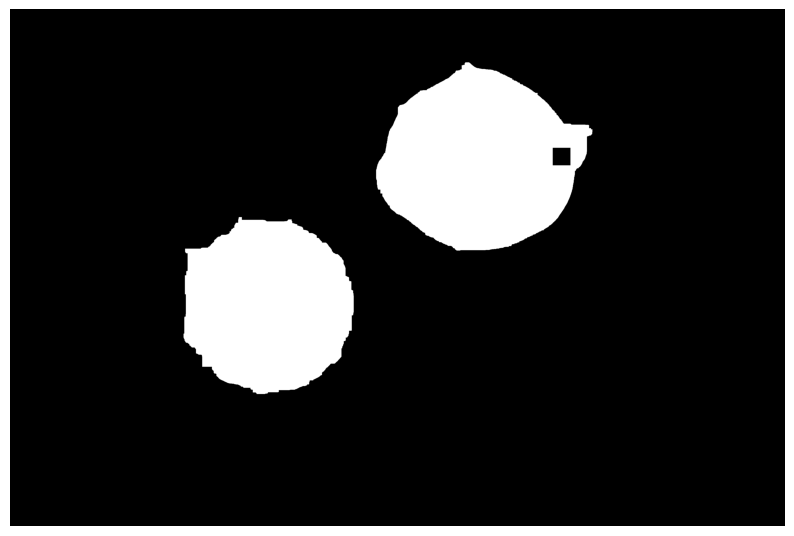

In [19]:
# the optimal kernel is 90
kernel = np.ones((90,90), np.uint8)
closing = morphologyEx(bina_otsu.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
# i want all the small noise to be removed with a small kernel
kernel = np.ones((15, 15), np.uint8)
opening = morphologyEx(closing, cv2.MORPH_OPEN, kernel)
# plot the image
plt.figure(figsize=(10, 10))
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.show()

In [20]:
# detect the contours
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw the contours
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [21]:
# store imgages
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    # crop the image
    cropped = image[y:y+h, x:x+w]
    cv2.imwrite(f"images/newly_cropped/cropped_{i}.jpg", cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))
    print(f"images/dishes/cropped_{i}.jpg saved")


images/dishes/cropped_0.jpg saved
images/dishes/cropped_1.jpg saved


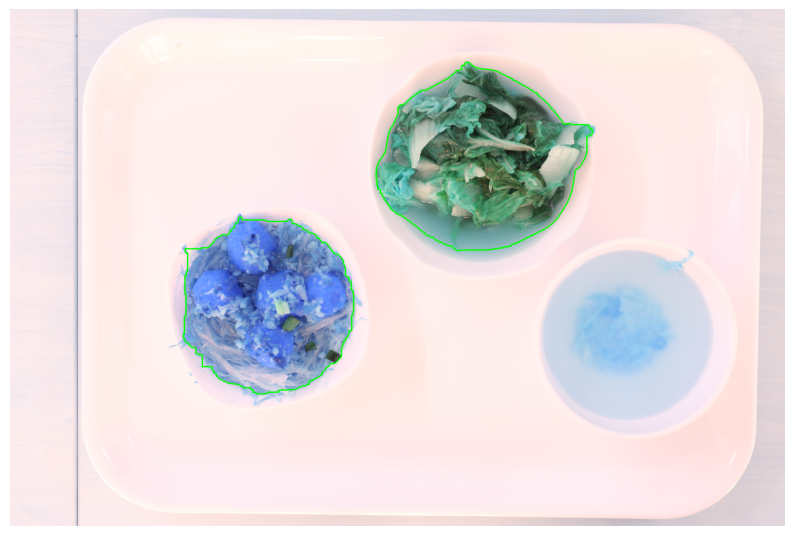

In [22]:
# show the contours
# detect the contours
# draw the contours
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image, contours, -1, (0, 255, 0), 5)
# plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


In [23]:
# print length of contours
print(f"number of contours: {len(contours)}")
# print the area of the contours
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    print(f"area of contour {i}: {area}")
    perimeter = cv2.arcLength(contour, True)
    print(f"perimeter of contour {i}: {perimeter}")




number of contours: 2
area of contour 0: 616970.5
perimeter of contour 0: 3271.457055091858
area of contour 1: 737609.5
perimeter of contour 1: 3524.2795493602753
